In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import DBSCAN
#inspired by https://www.kaggle.com/lambertosu/exploratory-analysis-with-density-based-clustering
#steps:
#Deal with data
#Separate the data in Weekday and 8-12, 12-6, 6-8 and plot with seaborn
#Find the most pick up pariod and use clustering to find which region

In [47]:
%matplotlib inline

In [48]:
uber_data = pd.read_csv('uber-raw-data-aug14.csv')
uber_data.head()
uber_data[20:30]

,Date/Time,Lat,Lon,Base
20,8/1/2014 0:48:00,40.7421,-74.0002,B02512
21,8/1/2014 0:52:00,40.7394,-74.0069,B02512
22,8/1/2014 0:53:00,40.7153,-73.9666,B02512
23,8/1/2014 0:54:00,40.6888,-73.9853,B02512
24,8/1/2014 0:54:00,40.7194,-74.0428,B02512
25,8/1/2014 0:55:00,40.7562,-73.9714,B02512
26,8/1/2014 0:58:00,40.7601,-73.9839,B02512
27,8/1/2014 1:01:00,40.7585,-73.9732,B02512
28,8/1/2014 1:08:00,40.7711,-73.9832,B02512
29,8/1/2014 1:09:00,40.7133,-74.0092,B02512


In [49]:
#taxi_data = pd.read_csv('nyc_taxi_data_2014.csv')
#taxi_data.head()

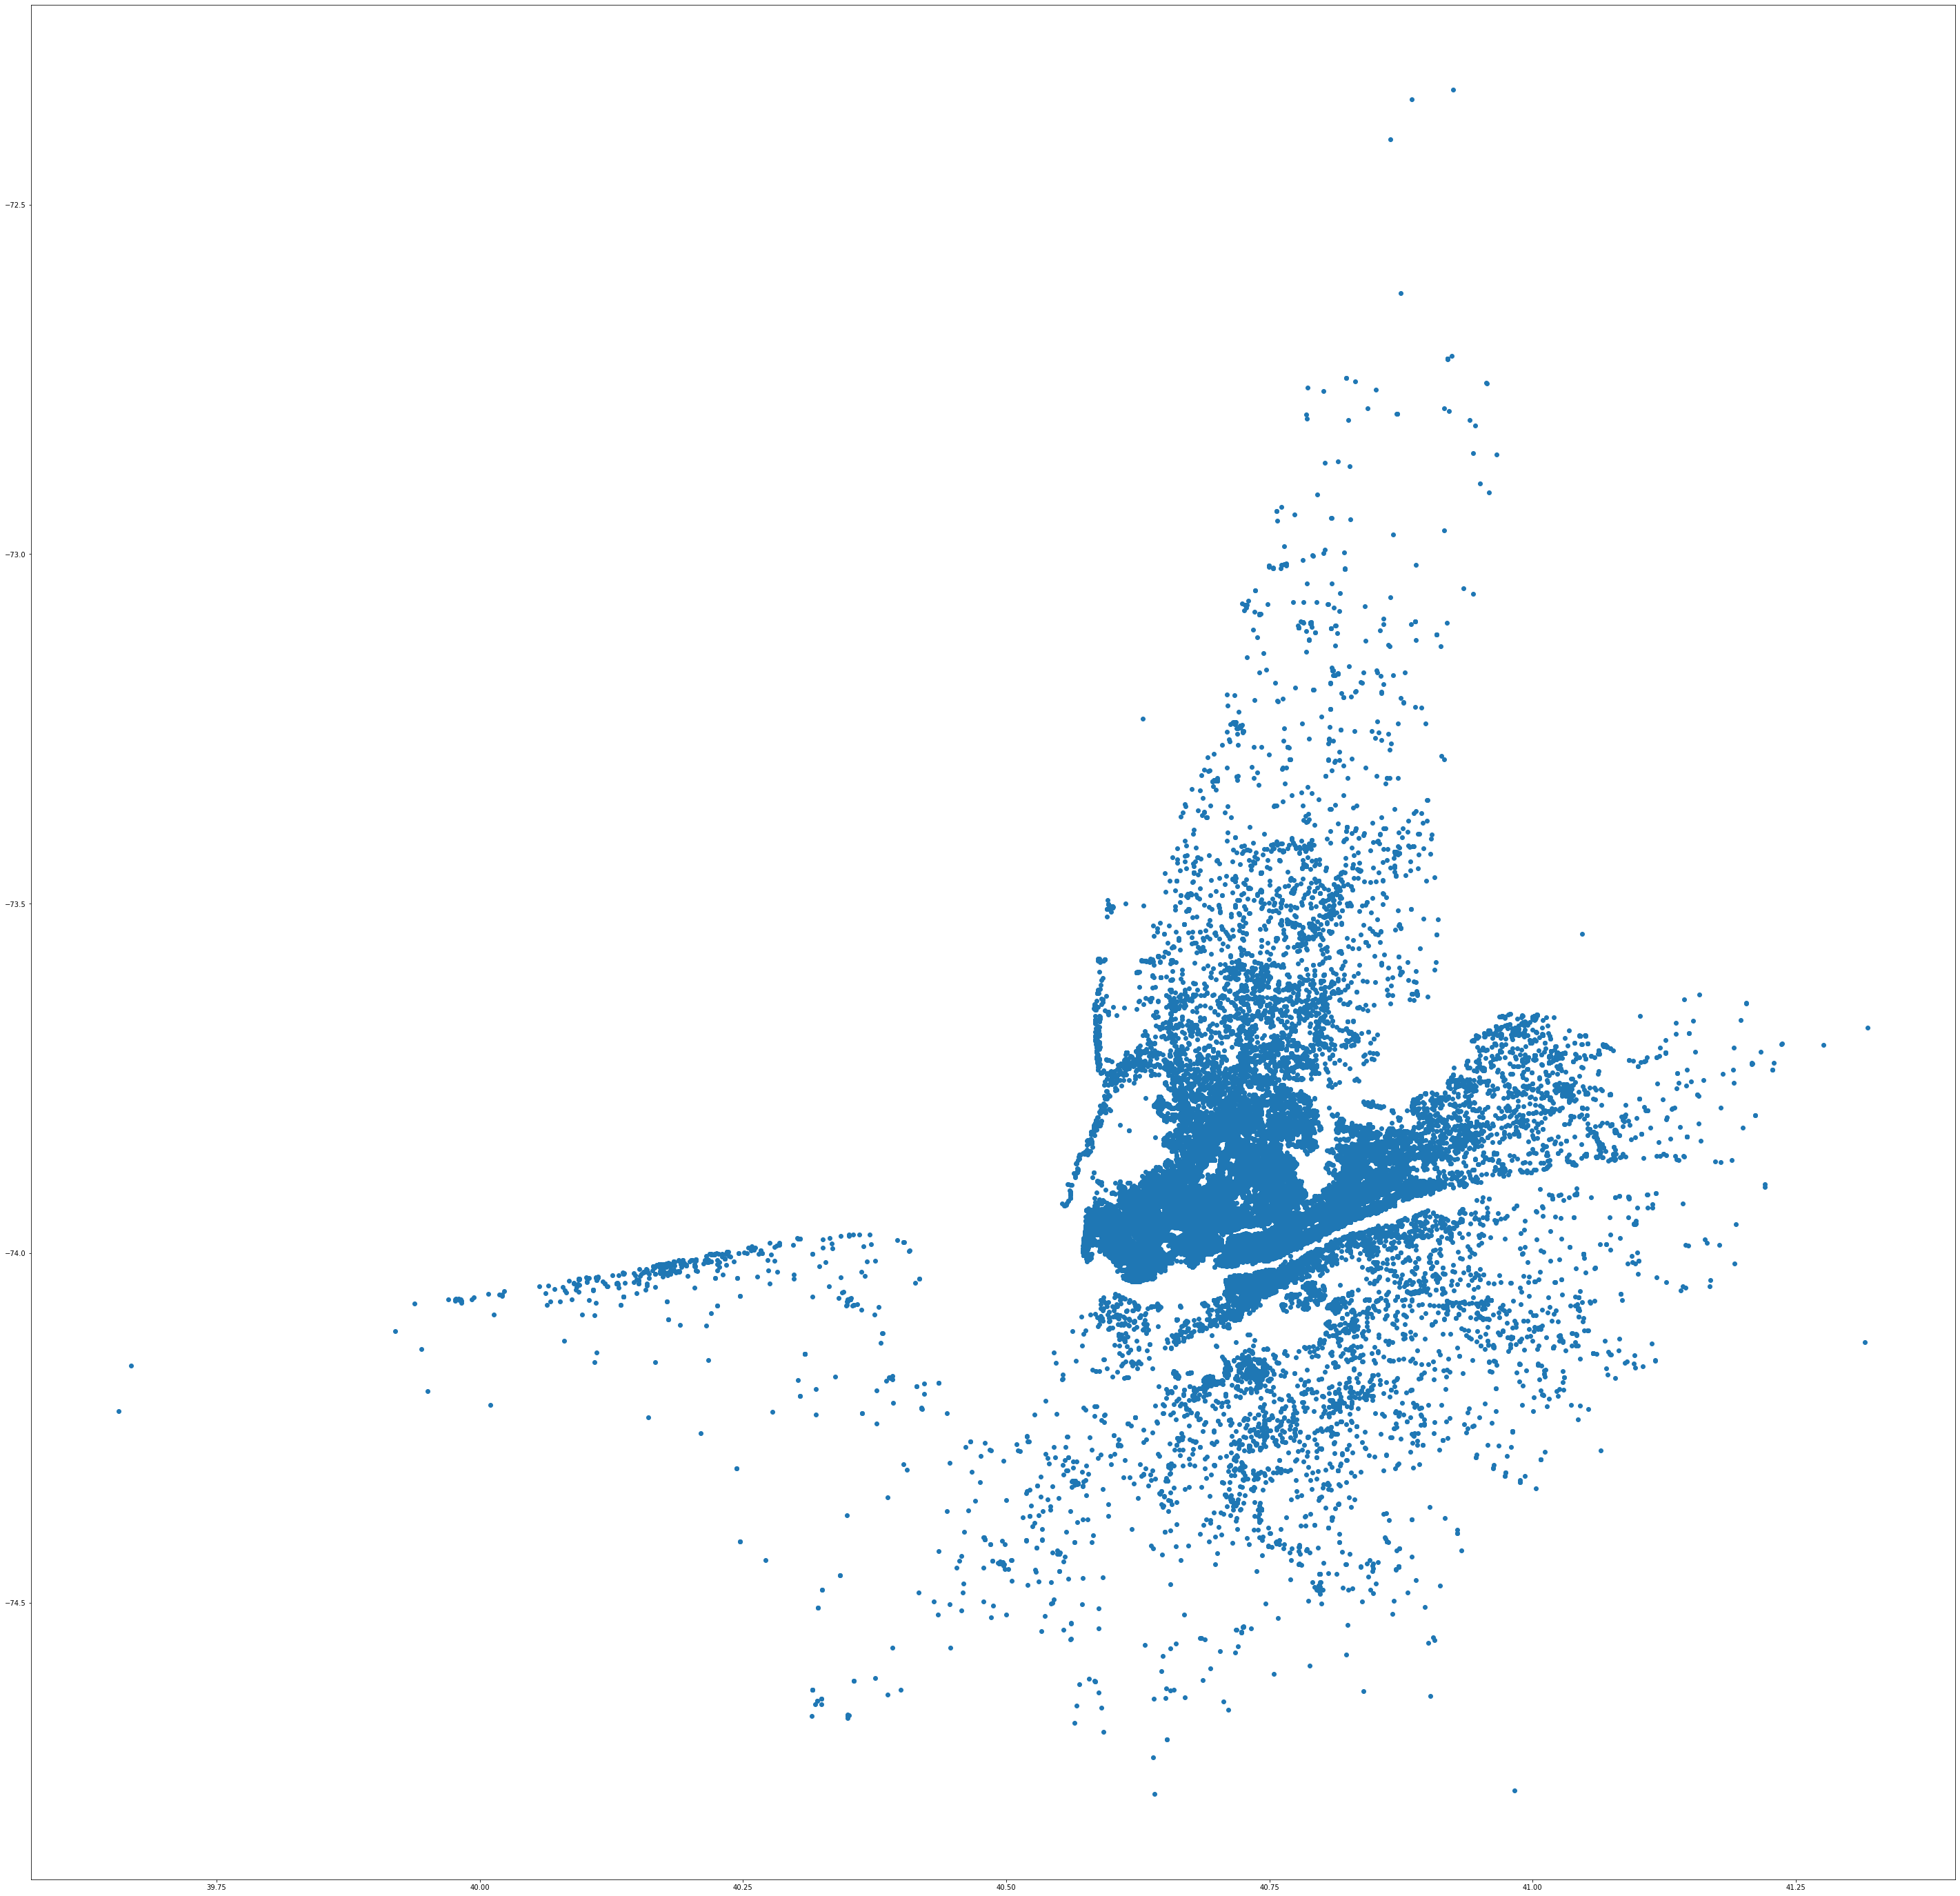

In [50]:
fig = plt.figure(figsize=(50, 50))
plt.scatter(uber_data["Lat"], uber_data["Lon"])
plt.show()
#we obtain a scatter map but it is mass so use clustering

In [51]:
#Deal with data
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format = '%m/%d/%Y %H:%M:%S')

In [52]:
uber_data['WeekDay'] = uber_data['Date/Time'].dt.dayofweek
uber_data['WeekDayName'] = uber_data['Date/Time'].dt.strftime("%A") 
uber_data['Month'] = uber_data['Date/Time'].dt.month
uber_data['Day'] = uber_data['Date/Time'].dt.day
uber_data['Hour'] = uber_data['Date/Time'].dt.hour

In [71]:
uber_data['Period'] = 'NaN'
uber_data.loc[(uber_data.Hour >=0)&(uber_data.Hour<=12), 'Period'] = 'AM'
uber_data.loc[(uber_data.Hour >12)&(uber_data.Hour<=18), 'Period'] = 'PM'
uber_data.loc[(uber_data.Hour >18)&(uber_data.Hour<=24), 'Period'] = 'Night'
uber_data['Count'] = 1
uber_data

,Date/Time,Lat,Lon,Base,WeekDay,WeekDayName,Month,Day,Hour,Period,Count
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,4,Friday,8,1,0,AM,1
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,4,Friday,8,1,0,AM,1
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,4,Friday,8,1,0,AM,1
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,4,Friday,8,1,0,AM,1
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,4,Friday,8,1,0,AM,1
...,...,...,...,...,...,...,...,...,...,...,...
829270,2014-08-31 23:55:00,40.7552,-73.9753,B02764,6,Sunday,8,31,23,Night,1
829271,2014-08-31 23:55:00,40.7552,-73.9753,B02764,6,Sunday,8,31,23,Night,1
829272,2014-08-31 23:55:00,40.7617,-73.9788,B02764,6,Sunday,8,31,23,Night,1
829273,2014-08-31 23:59:00,40.7395,-73.9889,B02764,6,Sunday,8,31,23,Night,1


In [59]:
uber_weekdays = uber_data.pivot_table(index=['WeekDayName'], values='Base', aggfunc='count')

In [60]:
uber_weekdays

,Base
WeekDayName,
Friday,148674
Monday,91633
Saturday,132225
Sunday,110246
Thursday,124117
Tuesday,107124
Wednesday,115256


In [73]:
uber_period = uber_data.pivot_table(index=['WeekDayName', 'Period'], values='Count', aggfunc='sum')
uber_period

Count
WeekDayName Period       
Friday      AM      53600
            Night   44167
            PM      50907
Monday      AM      37327
            Night   21871
            PM      32435
Saturday    AM      44713
            Night   43215
            PM      44297
Sunday      AM      44861
            Night   25948
            PM      39437
Thursday    AM      41881
            Night   39622
            PM      42614
Tuesday     AM      37851
            Night   29057
            PM      40216
Wednesday   AM      42791
            Night   31773
            PM      40692

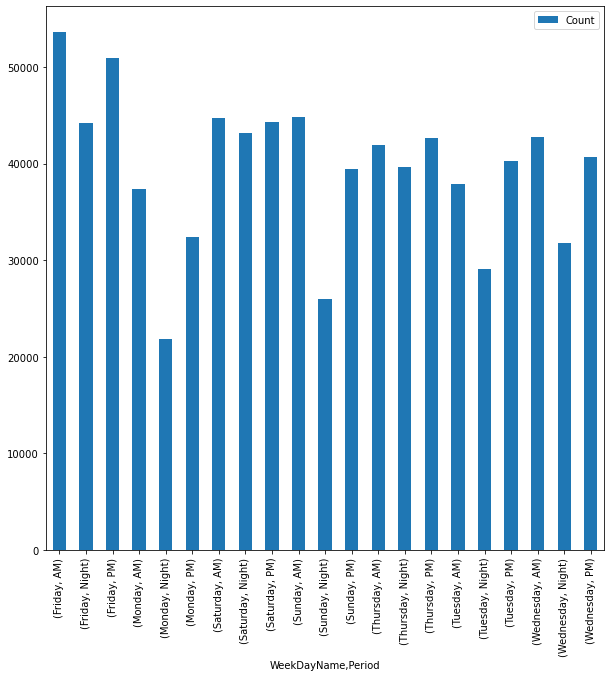

In [74]:
uber_period.plot(kind='bar', figsize = (10, 10))

Text(0.5, 1.0, '19:00 - 23:59 count by weekday')

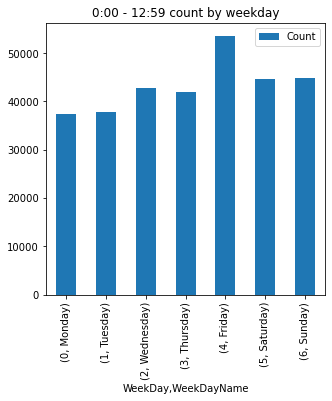

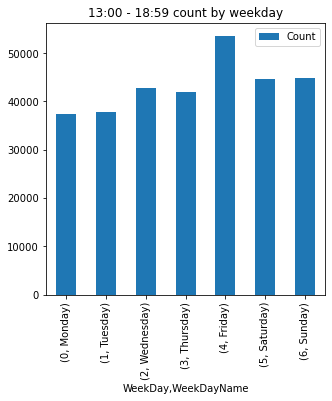

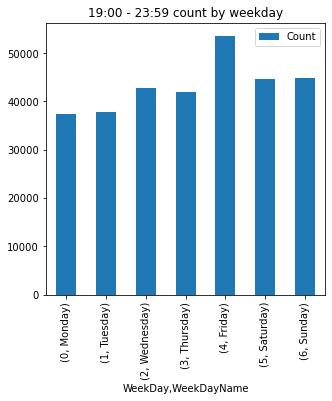

In [94]:
uber_am = uber_data.loc[uber_data.Period == 'AM']
uber_am_weekday = uber_am.pivot_table(index=['WeekDay','WeekDayName'], values='Count', aggfunc='sum')
uber_am_weekday.plot(kind='bar', figsize = (5, 5))
plt.title('0:00 - 12:59 count by weekday')
uber_pm = uber_data.loc[uber_data.Period == 'PM']
uber_pm_weekday = uber_am.pivot_table(index=['WeekDay','WeekDayName'], values='Count', aggfunc='sum')
uber_pm_weekday.plot(kind='bar', figsize = (5, 5))
plt.title('13:00 - 18:59 count by weekday')
uber_ni = uber_data.loc[uber_data.Period == 'Night']
uber_ni_weekday = uber_am.pivot_table(index=['WeekDay','WeekDayName'], values='Count', aggfunc='sum')
uber_ni_weekday.plot(kind='bar', figsize = (5, 5))
plt.title('19:00 - 23:59 count by weekday')
#'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'

In [98]:
uber_friday = uber_data.loc[uber_data.WeekDayName == 'Friday']
uber_friday_am = uber_friday.loc[uber_friday.Period == 'AM']
uber_friday_pm = uber_friday.loc[uber_friday.Period == 'PM']
uber_friday_ni = uber_friday.loc[uber_friday.Period == 'Night']

[ 40.72984024 -73.99809513]
58811


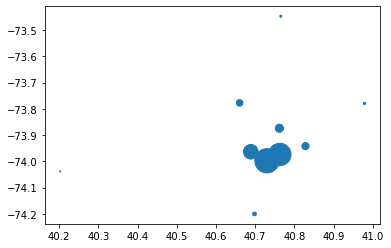

In [138]:
from sklearn.cluster import KMeans
num_clusters = 10
X = uber_friday[['Lat','Lon']].to_numpy()
kms = KMeans(n_clusters = num_clusters)
y = kms.fit_predict(X)
#plt.scatter(uber_friday['Lat'], uber_friday['Lon'], c=y)
#plt.show()
#print(kms.cluster_centers_)
centers = kms.cluster_centers_
cluster_count = [0]*num_clusters
for item in y:
    cluster_count[item] +=1
cluster_max=0
max_index = 0
for i in range(len(cluster_count)):
    if cluster_count[i] > cluster_max:
        cluster_max = cluster_count[i]
        max_index = i
    cluster_count[i] = cluster_count[i]/100
print(centers[max_index])
print(cluster_max)
plt.scatter(centers[:,0], centers[:,1], s= cluster_count, marker='o')
plt.show()

In [ ]:
dbs = DBSCAN()
y_dbs = dbs.fit_predict(X)
plt.scatter(centers[:,0], centers[:,1], c=y_dbs)
plt.show()